# I follow the tutorial from

 https://www.youtube.com/watch?v=pXGBHV3y8rs&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=12

In [1]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

%cd /content/drive/MyDrive/Tensorflow_Practice
# !mkdir HW13     # I HAVE MADE IT. 


Mounted at /content/drive
/content/drive/MyDrive/Tensorflow_Practice


In [2]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [4]:
df.shape

(28, 3)

In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df[["age", "affordibility"]], df.bought_insurance, test_size=0.2, random_state=2)

In [6]:
X_train_scaled = X_train.copy()
X_train_scaled["age"] = X_train_scaled["age"]/100

X_test_scaled = X_test.copy()
X_test_scaled["age"] = X_test_scaled["age"] / 100

y = wx + b 

if kernel_initializer="ones", w = 1 

if bias_initializer="zeros", b = 0

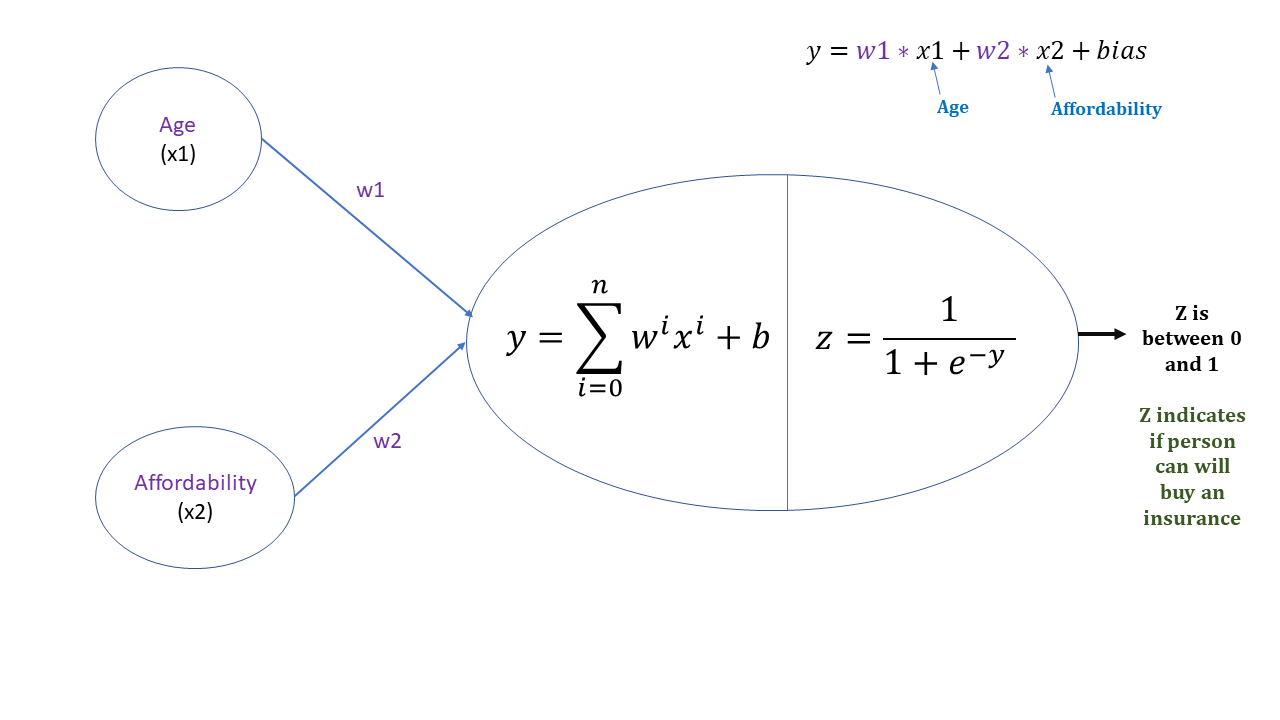

In [7]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2, ), 
                       activation="sigmoid", 
                       kernel_initializer="ones", 
                       bias_initializer="zeros")
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
Epoch 2501/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5436 - accuracy: 0.7273
Epoch 2502/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5436 - accuracy: 0.7273
Epoch 2503/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5435 - accuracy: 0.7273
Epoch 2504/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5435 - accuracy: 0.7273
Epoch 2505/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5435 - accuracy: 0.7273
Epoch 2506/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.5434 - accuracy: 0.7273
Epoch 2507/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.5434 - accuracy: 0.7273
Epoch 2508/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5433 - accuracy: 0.7273
Epoch 2509/5000
1/1 [==============================] - 0s 7ms/step - loss: 0.5433 - accuracy: 0.7273
Epoch 2510/5000
1/1 [===================

In [8]:
model.evaluate(X_test_scaled, y_test) # it will round the number in the array when evaluating

1/1 [==============================] - 0s 186ms/step - loss: 0.3153 - accuracy: 1.0000


[0.3152587413787842, 1.0]

In [9]:
print(model.predict(X_test_scaled))
print(X_test_scaled[:2])

[[0.16282053]
 [0.41183788]
 [0.7255057 ]
 [0.8266829 ]
 [0.36513165]
 [0.80450755]]
    age  affordibility
1  0.25              0
0  0.22              1


In [10]:
coef, intercept = model.get_weights() # coef is weights and intercept is bias
coef, intercept

(array([[4.919671 ],
        [1.4286072]], dtype=float32), array([-2.8673077], dtype=float32))

# Let's handcarve how neural network works from scratch in python

In [11]:
def sigmoid(x):
  import math 
  return 1/(1+math.exp(-x))

In [12]:
def prediction_function(age, affordibility):
  weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
  return sigmoid(weighted_sum)

In [13]:
prediction_function(.25, 0) # is the same as model.predict(X_test_scaled) first case above ! 

0.16282053251971626

In [14]:
def sigmoid_numpy(X): # here's an efficient way to calculate array number's sigmoid
  return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [15]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

In [16]:
def gradient_decent(age, affordibility, y_true, epochs, loss_threshold):
  # w1, w2, bias 
  # kernel_initializer="ones", w = 1
  # bias_initializer="zeros", b = 0
  w1 = w2 = 1 
  bias = 0
  learning_rate = 0.5
  n = len(age)

  for i in range(epochs):
    weighted_sum = w1 * age + w2 * affordibility + bias  # numpy array will finish these vector calculate in one shot
    y_predicted = sigmoid_numpy(weighted_sum)

    loss = log_loss(y_true, y_predicted)

    # how we implement back propogation
    # w1d equals to gradient descent w1 
    w1d = (1/n)*np.dot(np.transpose(age), (y_predicted-y_true)) 
    w2d = (1/n)*np.dot(np.transpose(affordibility), (y_predicted-y_true))
    bias_d = np.mean(y_predicted-y_true)

    w1 = w1 - learning_rate * w1d 
    w2 = w2 - learning_rate * w2d
    bias = bias -  learning_rate * bias_d

    print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

    if loss<= loss_threshold:
      break
  return w1, w2, bias    


In [17]:
gradient_decent(X_train_scaled['age'], X_train_scaled['affordibility'], y_train, 1000, 0.4781)

Epoch:0, w1:0.973391914875179, w2:0.9484790550524685, bias:-0.11334365204477419, loss:0.714610156590683
Epoch:1, w1:0.9526050112606814, w2:0.9061888855737805, bias:-0.21202325373024938, loss:0.6844545754122794
Epoch:2, w1:0.9371389216394038, w2:0.8724863718378795, bias:-0.29735477734867394, loss:0.6623114062843336
Epoch:3, w1:0.9263972300850559, w2:0.8464964034855741, bias:-0.3708685783767046, loss:0.6463299135248588
Epoch:4, w1:0.9197530021886515, w2:0.8272363836850969, bias:-0.4341501414207024, loss:0.6349055537023248
Epoch:5, w1:0.9165978234998884, w2:0.8137152861544186, bias:-0.48872346395231214, loss:0.6267483980102484
Epoch:6, w1:0.9163723575035057, w2:0.804999539668341, bias:-0.5359802497218649, loss:0.6208785684684357
Epoch:7, w1:0.9185813941347364, w2:0.8002492021116546, bias:-0.5771466732016118, loss:0.6165824439197473
Epoch:8, w1:0.9227979840062284, w2:0.7987322635165252, bias:-0.6132761019356342, loss:0.6133562082414478
Epoch:9, w1:0.9286609028533963, w2:0.7998249643661494,

(4.902834960491424, 1.476022916232298, -2.909122064576124)

In [18]:
w1, w2, bias = 4.902834960491424, 1.4760229162322975, -2.9091220645761235
print(coef, intercept)
print(w1, w2, bias)
# they are really close !!!

[[4.919671 ]
 [1.4286072]] [-2.8673077]
4.902834960491424 1.4760229162322975 -2.9091220645761235


In [24]:
a = np.array([1,2,3])
b = np.array([5,6,7])
print(np.dot(a,b))
print(np.dot(np.transpose(a),b))
print(a)
print(np.transpose(a))

38
38
[1 2 3]
[1 2 3]


In [37]:
class myNN:
  def __init__(self):
    self.w1 = 1 
    self.w2 = 1 
    self.bias = 0 
  
  def fit(self, X, y, epochs, loss_threshold):
    self.w1, self.w2, self.bias = self.gradient_decent(X['age'], X['affordibility'], y, epochs, loss_threshold)
    print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

  def predict(self, X_test):
    weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
    return sigmoid_numpy(weighted_sum)

  def gradient_decent(self, age, affordibility, y_true, epochs, loss_threshold):
    # w1, w2, bias 
    # kernel_initializer="ones", w = 1
    # bias_initializer="zeros", b = 0
    w1 = 1
    w2 = 1
    bias = 0
    learning_rate = 0.5
    n = len(age)

    for i in range(epochs):
      weighted_sum = w1 * age + w2 * affordibility + bias  # numpy array will finish these vector calculate in one shot
      y_predicted = sigmoid_numpy(weighted_sum)

      loss = log_loss(y_true, y_predicted)

      # how we implement back propogation
      # w1d equals to gradient descent w1 
      w1d = (1/n)*np.dot(np.transpose(age), (y_predicted-y_true)) 
      w2d = (1/n)*np.dot(np.transpose(affordibility), (y_predicted-y_true))
      bias_d = np.mean(y_predicted-y_true)

      w1 = w1 - learning_rate * w1d 
      w2 = w2 - learning_rate * w2d
      bias = bias -  learning_rate * bias_d

      print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

      if loss<= loss_threshold:
        break
    return w1, w2, bias    


In [38]:
handcarve_model = myNN()
handcarve_model.fit(X_train_scaled, y_train, epochs=1000, loss_threshold=0.4781)

Epoch:0, w1:0.973391914875179, w2:0.9484790550524685, bias:-0.11334365204477419, loss:0.714610156590683
Epoch:1, w1:0.9526050112606814, w2:0.9061888855737805, bias:-0.21202325373024938, loss:0.6844545754122794
Epoch:2, w1:0.9371389216394038, w2:0.8724863718378795, bias:-0.29735477734867394, loss:0.6623114062843336
Epoch:3, w1:0.9263972300850559, w2:0.8464964034855741, bias:-0.3708685783767046, loss:0.6463299135248588
Epoch:4, w1:0.9197530021886515, w2:0.8272363836850969, bias:-0.4341501414207024, loss:0.6349055537023248
Epoch:5, w1:0.9165978234998884, w2:0.8137152861544186, bias:-0.48872346395231214, loss:0.6267483980102484
Epoch:6, w1:0.9163723575035057, w2:0.804999539668341, bias:-0.5359802497218649, loss:0.6208785684684357
Epoch:7, w1:0.9185813941347364, w2:0.8002492021116546, bias:-0.5771466732016118, loss:0.6165824439197473
Epoch:8, w1:0.9227979840062284, w2:0.7987322635165252, bias:-0.6132761019356342, loss:0.6133562082414478
Epoch:9, w1:0.9286609028533963, w2:0.7998249643661494,

In [39]:
print(coef, intercept)
print(model.get_weights())
print(handcarve_model.w1, handcarve_model.w2, handcarve_model.bias)

[[4.919671 ]
 [1.4286072]] [-2.8673077]
[array([[4.919671 ],
       [1.4286072]], dtype=float32), array([-2.8673077], dtype=float32)]
4.902834960491424 1.476022916232298 -2.909122064576124
